### Sentiment Analysis on Data from NASDAQ500

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
import yfinance as yf
import os
plt.style.use('ggplot')

data_folder = '/Users/dev/Desktop/Machine learning/Quant/sentiment_data.csv'

sentiment_df = pd.read_csv(data_folder)

sentiment_df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


Lets fix it up a bit

In [4]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

Something that might be interesting is the engagement that popele have with the posts on twitter. There are definitley bots, so some sort of ratio might be useful to have. maybe comments/likes? because if there are alot of likes and no comments, there is a good chance that the post is infested with bots

In [6]:
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments'] / sentiment_df['twitterLikes']

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           ABT                64089.0               NaN          0.230769  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
...                               ...               ...               ...  
2023-01-04 TMO                30857.0          0.610020          0.062500  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[27235 rows x 6 columns]

And then perhaps we can filter out stocks that have a certain number of likes and comments on a given day

In [8]:
sentiment_df = sentiment_df[(sentiment_df['twitterComments'] > 10) & (sentiment_df['twitterLikes'] > 20)]

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

Now it would be pretty useful to have the average engagement ratio for each of our stocks every month

In [13]:
collected_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='ME'), 'symbol'])
[['engagement_ratio']].mean())

#we can also create a useful new column that ranks the engagement ratio!

collected_df['rank'] = (collected_df.groupby(level=0)['engagement_ratio']
                        .transform(lambda x: x.rank(ascending=False)))

collected_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

### Super fun part!
Time to zoom in on the __top 5 stocks__ based on our ranking system

In [22]:
ranked_df = collected_df[collected_df['rank'] < 6]
ranked_df = ranked_df.reset_index(level=1)
ranked_df.index = ranked_df.index + pd.DateOffset(1)

ranked_df = ranked_df.reset_index().set_index(['date', 'symbol'])

ranked_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

Lets just create a dictionary with the beginning of each monht and the stocks that rank in the top 5 for that month

In [23]:
dates = ranked_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = ranked_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

Monthly rebalancing

In [26]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list, start='2021-01-01', end='2023-03-01')

/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_25387/1206357921.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices_df = yf.download(tickers=stocks_list, start='2021-01-01', end='2023-03-01')
[*********************100%***********************]  85 of 85 completed

2 Failed downloads:
['MRO', 'ATVI']: YFTzMissingError('possibly delisted; no timezone found')


In [27]:
prices_df

Price      Adj Close           Close                                 \
Ticker          ATVI MRO           A    AAL         AAP        AAPL   
Date                                                                  
2021-01-04       NaN NaN  115.337708  15.13  141.919525  126.239700   
2021-01-05       NaN NaN  116.280724  15.43  141.766205  127.800514   
2021-01-06       NaN NaN  119.469421  15.52  149.956284  123.498528   
2021-01-07       NaN NaN  122.648407  15.38  151.237106  127.712662   
2021-01-08       NaN NaN  123.523361  15.13  153.392883  128.814987   
...              ...  ..         ...    ...         ...         ...   
2023-02-22       NaN NaN  139.786148  15.56  136.307022  147.230225   
2023-02-23       NaN NaN  140.888046  15.87  134.779037  147.714691   
2023-02-24       NaN NaN  138.920349  15.56  131.779922  145.055038   
2023-02-27       NaN NaN  139.884521  15.63  133.469299  146.251358   
2023-02-28       NaN NaN  139.677917  15.98  137.578827  145.747147   

Price                                                     ...   Volume  \
Ticker            ABBV         ABT        AEP        AES  ...      RCL   
Date                                                      ...            
2021-01-04   88.119606  100.580063  68.997726  19.842182  ...  5732800   
2021-01-05   89.030807  101.824493  68.904640  20.508139  ...  4029500   
2021-01-06   88.261711  101.612503  69.454674  21.327784  ...  3612500   
2021-01-07   89.206345  102.598862  67.601517  21.114338  ...  3993700   
2021-01-08   89.674500  102.884628  67.000740  21.703451  ...  3104200   
...                ...         ...        ...        ...  ...      ...   
2023-02-22  138.443436   98.180710  83.101860  22.980518  ...  2044600   
2023-02-23  139.729843   98.046852  83.001205  22.980518  ...  2066600   
2023-02-24  140.317902   96.048622  82.745003  22.917160  ...  2875100   
2023-02-27  141.760513   95.388931  82.415581  22.518915  ...  2459700   
2023-02-28  141.411346   97.253311  80.494064  22.337896  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 427 columns]

In [32]:
returns_df = np.log(prices_df['Close']).diff()
returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010287,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047068
2021-01-06,0.027053,0.005816,0.056165,-0.034241,-0.008676,-0.002084,0.007951,0.039189,0.072037,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026261,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010058,0.049579,0.052090,...,0.024355,0.023359,0.019071,0.022759,0.002679,0.030686,0.076448,-0.011541,0.005581,0.007815
2021-01-08,0.007109,-0.016388,0.014154,0.008594,0.005234,0.002781,-0.008927,0.027519,0.000543,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006920,0.023643,0.075481,-0.009018,0.007641,0.011060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008789,-0.009305,-0.000330,-0.007064,0.018386,-0.002086,...,-0.003490,0.002088,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011273,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029585,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018169,0.004200,-0.020591,-0.003092,-0.002761,-0.017205,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


Equally weighed portfolio return for every month for those stocks which we selected based on the best monthly engagement ratios

In [41]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)  + pd.offsets.BMonthEnd()).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


#### Lets now gather NASDAQ/QQQ prices and have a comparison to our strategy laid out above

In [53]:
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')

qqq_return = np.log(qqq_df['Close']).diff()

portfolio_df = portfolio_df.merge(qqq_return, left_index=True, right_index=True)

portfolio_df

/var/folders/40/b39qh12x3dj80dkq4q34vz4h0000gn/T/ipykernel_25387/1028158659.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')
[*********************100%***********************]  1 of 1 completed


,portfolio_return,QQQ
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


It would be great if we could visualize this

Text(0.5, 1.0, 'Engagement ratio strategy')

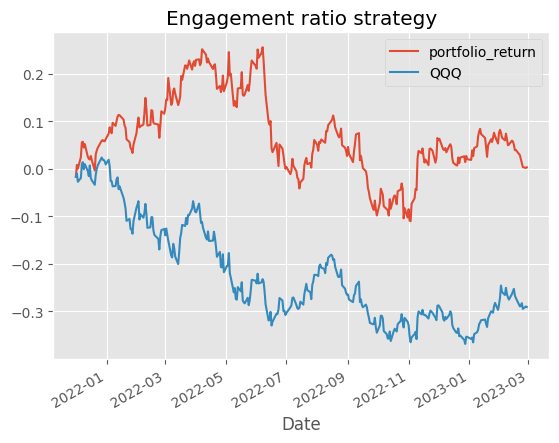

In [56]:
#cumulative sum
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolio_cumulative_return.plot()

plt.title('Engagement ratio strategy')
